In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych

In [2]:
hypertension_df = pd.read_csv('hypertension_data.csv')
hypertension_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Podział kolumn na numeryczne i binarne
hypertension_binary_features = [col for col in hypertension_df if np.isin(hypertension_df[col].dropna().unique(), [0, 1]).all()]
hypertension_numerical_features = list(hypertension_df.drop(hypertension_binary_features, axis=1).columns)

In [4]:
hypertension_binary_features

['sex', 'fbs', 'exang', 'target']

In [5]:
hypertension_numerical_features

['age',
 'cp',
 'trestbps',
 'chol',
 'restecg',
 'thalach',
 'oldpeak',
 'slope',
 'ca',
 'thal']

# Podstawowe informacje

In [6]:
hypertension_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [7]:
hypertension_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26083.000000,26058.00000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,55.661389,0.50000,0.958594,131.592992,246.246061,0.149753,0.526512,149.655024,0.326573,1.039512,1.400299,0.721849,2.318752,0.547253
std,15.189768,0.50001,1.023931,17.588809,51.643522,0.356836,0.525641,22.858109,0.468969,1.165138,0.616513,1.011608,0.604659,0.497772
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


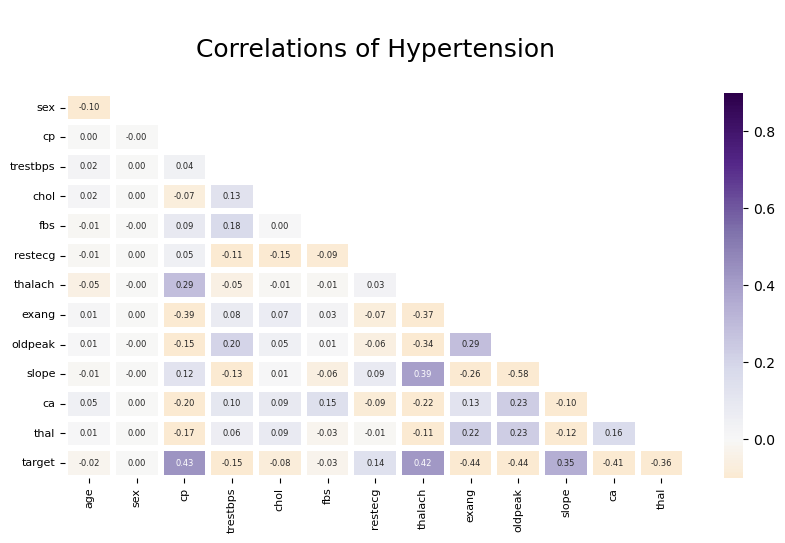

In [8]:
# Macierz korelacji
fig, ax = plt.subplots(figsize=(10,5))   

mask = np.triu(np.ones_like(hypertension_df.corr(numeric_only = True), dtype=bool))[1:, :-1]
corr = hypertension_df.corr(numeric_only = True).iloc[1:,:-1].copy()

ax = sns.heatmap(corr, mask=mask, vmin=-.1, vmax=.9, center=0, annot=True, fmt='.2f', 
               cmap ='PuOr', linewidths=4, annot_kws={"fontsize":6})

ax.set_title('\nCorrelations of Hypertension\n', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

# Fiolet - wartości dodatnie, Biały - zero, Pomarańcz - wartości ujemne

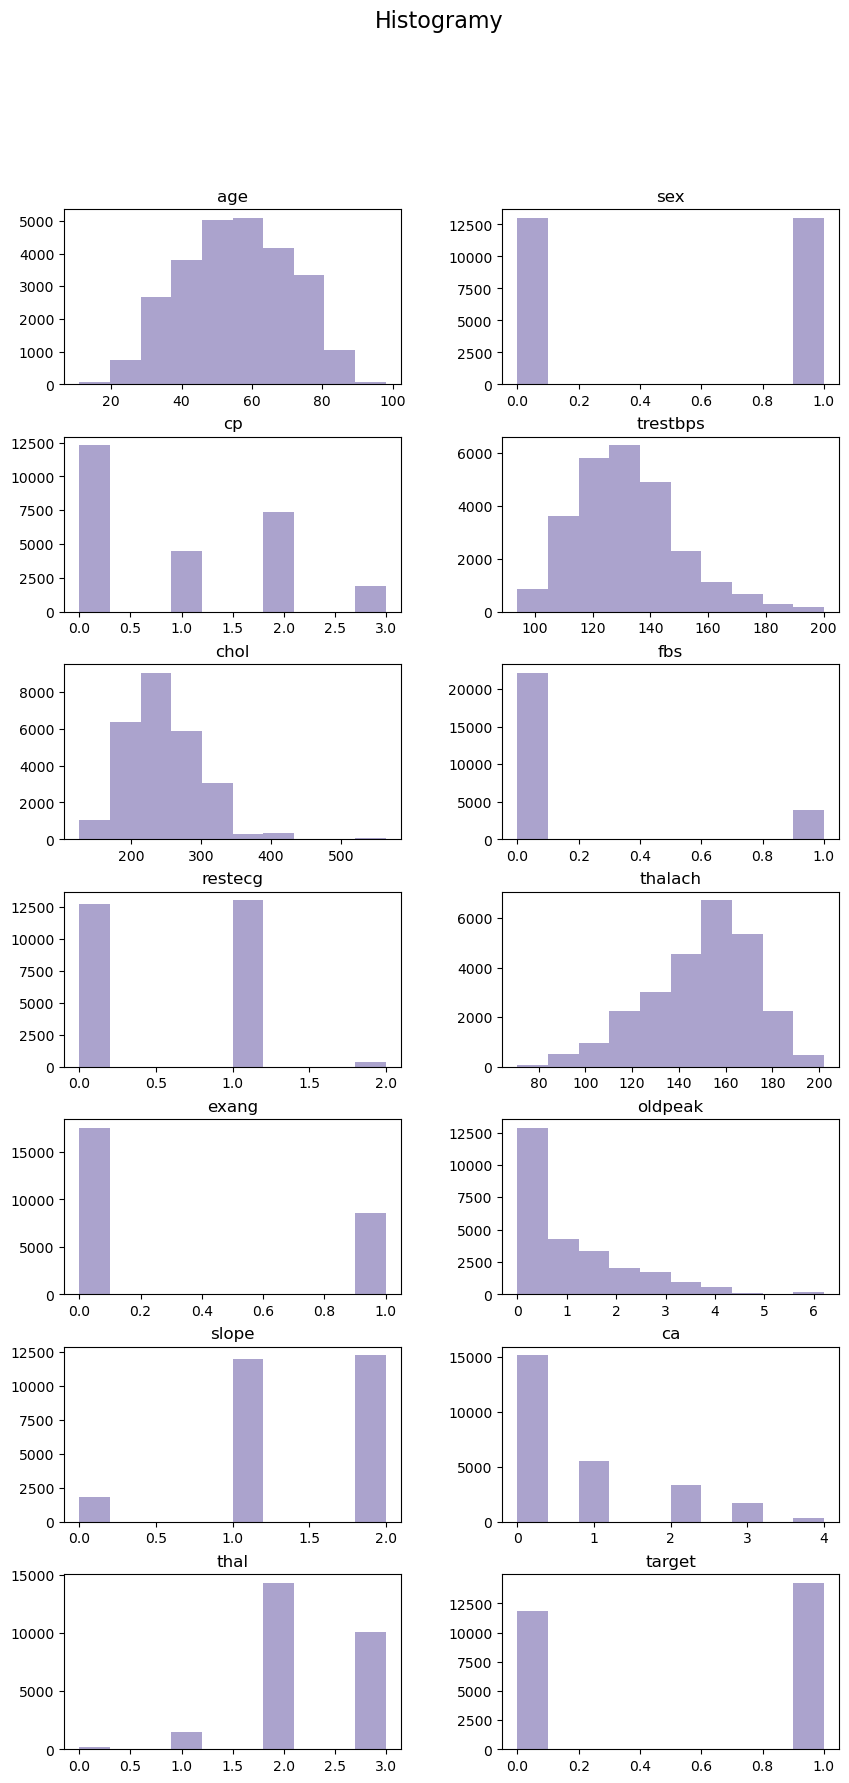

In [9]:
# Rozkład wszystkich cech
fig2, axis2 = plt.subplots(7, 2, figsize=(10,20))
fig2.suptitle('Histogramy', fontsize=16)
hypertension_df.hist(grid = False, ax = axis2, color = '#aba3cd')
plt.show()

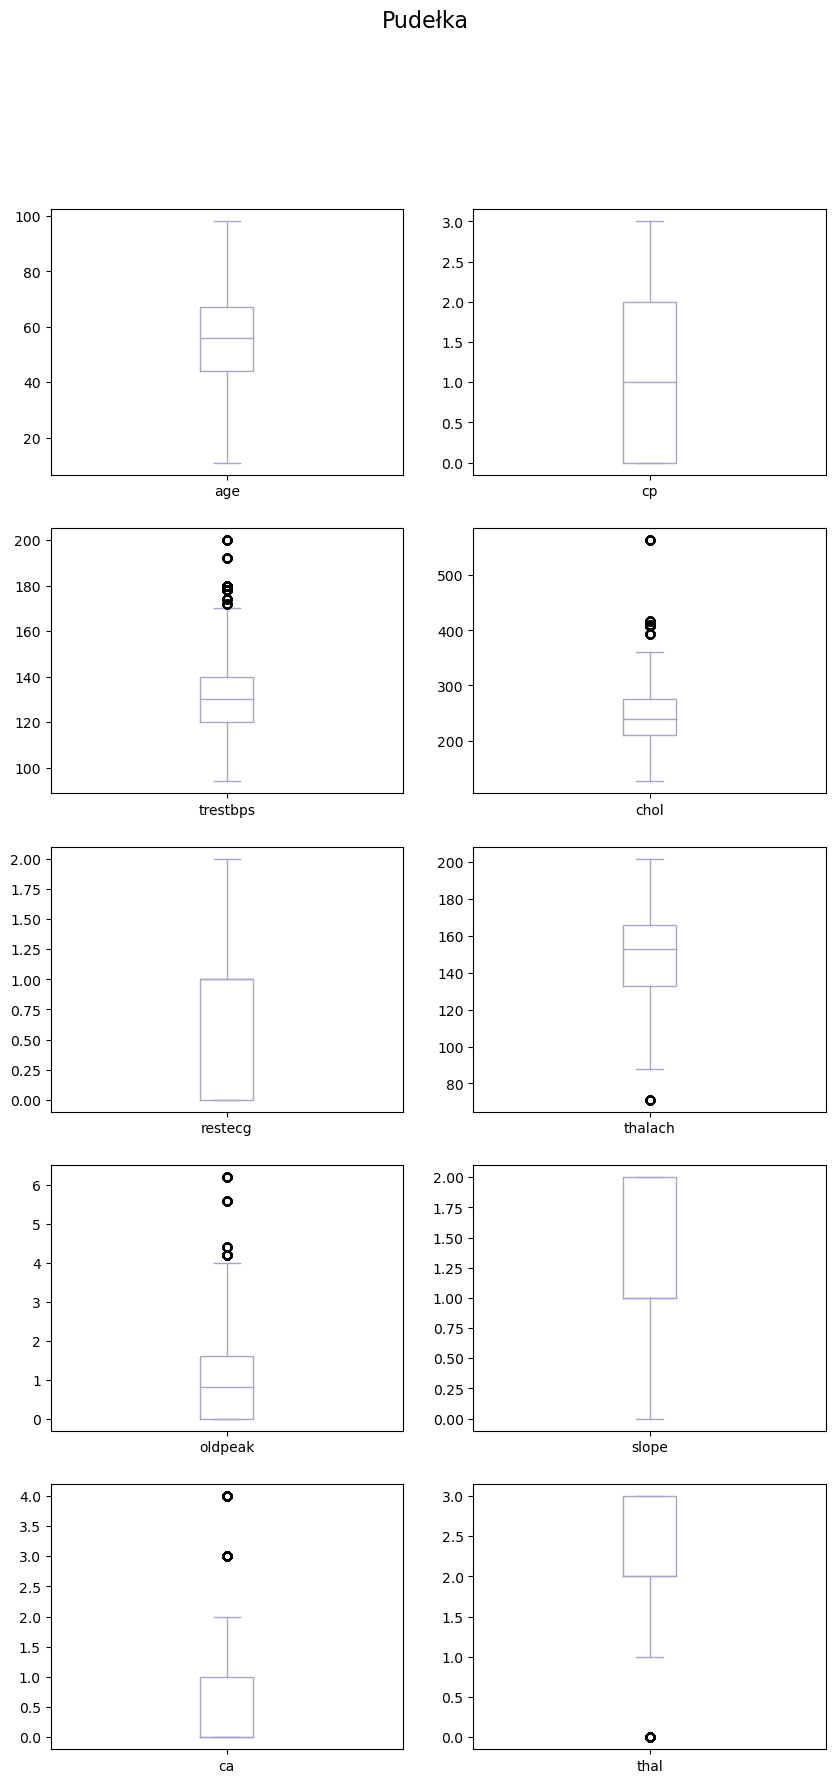

In [11]:
# Boxploty dla cech numerycznych
fig1, axis1 = plt.subplots(5, 2, figsize=(10,20))
fig1.suptitle('Pudełka', fontsize=16)
for ax, column in enumerate(hypertension_df[hypertension_numerical_features]):
    hypertension_df[hypertension_numerical_features].boxplot(column = column, grid = False, color = '#aba3cd', ax=axis1.ravel()[ax])
plt.show()

# Usunięcie wartości odstających